In [1]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
from astroquery.gaia import Gaia
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print (table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_astrophysical_parameters
external.external.gaiadr2_geometric_distance
external.external.gaiaedr3_distance
external.external.gaiaedr3_gcns_main_1
external.external.gaiaedr3_gcns_rejected_1
external.external.gaiaedr3_spurious
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.ravedr6
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour


In [4]:
job = Gaia.launch_job_async(
    "SELECT * FROM gaiadr1.gaia_source "
    "WHERE CONTAINS(POINT('ICRS',gaiadr1.gaia_source.ra,gaiadr1.gaia_source.dec),CIRCLE('ICRS',56.75,24.1167,2))=1;",
    dump_to_file=True
)
print (job)

Jobid: 1657405058687O
Phase: COMPLETED
Owner: None
Output file: 1657405058687O-result.vot.gz
Results: None


In [5]:
r = job.get_results()
print(type(r['pmra']))
idx = np.where(np.logical_not(r['pmra'].mask))[0]
# print(np.where(np.logical_not(r['pmdec'].mask))[0])
# print(r['pmra'][124])
"""
k = r['pmra'].mask
print(k.all())
# print(k.mask)
r['pmra'].mask[:] = False
z = r['pmra']
print(np.where(z is not np.nan))
print(z.min())
"""

<class 'astropy.table.column.MaskedColumn'>


"\nk = r['pmra'].mask\nprint(k.all())\n# print(k.mask)\nr['pmra'].mask[:] = False\nz = r['pmra']\nprint(np.where(z is not np.nan))\nprint(z.min())\n"

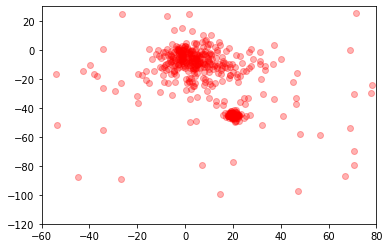

In [17]:
plt.scatter(r['pmra'], r['pmdec'], color='r', alpha=0.3)
plt.xlim(-60,80)
plt.ylim(-120,30)

plt.show()

98538


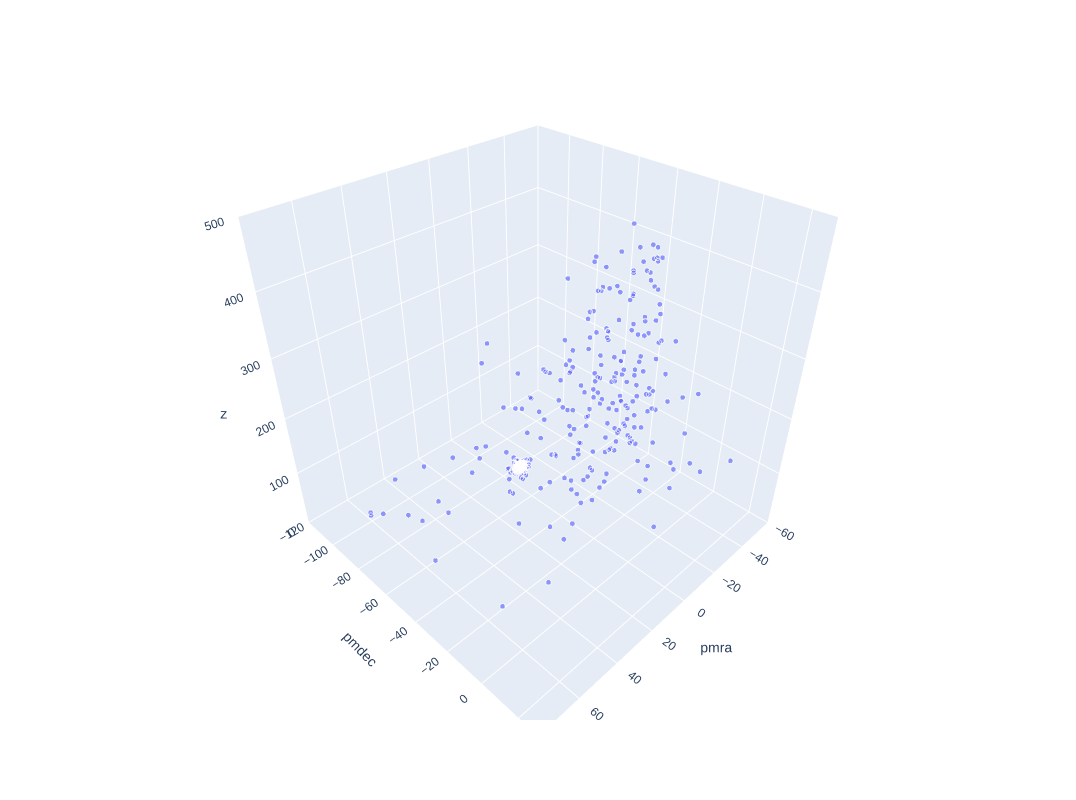

In [38]:
import plotly.express as px
df = r.to_pandas()
print(df.shape[0])
distance = 1000/r['parallax']
px.scatter_3d(
    df, x='pmra', y='pmdec', z=distance, range_x=[-60, 80], range_y=[-120, 30], range_z=[0,500],
    size=df.shape[0] * [1], size_max=5, height=800, width=800,
)
# df = r.to_pandas()
# print(df['pmra'])
# px.scatter(x=r['pmra'][idx], y=r['pmdec'][idx])
#print(z)